In [ ]:
"""
rules from assignment:

(1–2 members) Another game.  There are two players, A and B.  At the beginningof the game, 
each starts with 4 coins, and there are 2 coins in the pot.  A goes first,then B, then A,. . . .  
During a particular player’s turn, the player tosses a 6-sideddie.  If the player rolls a:
•1, then the player does nothing.
•2:  then the player takes all coins in the pot.
•3:  then the player takes half of the coins in the pot (rounded down).
•4,5,6:  then the player puts a coin in the pot.

A player 
loses (and the game is over) if they are unable to perform the task (i.e.,if they have 0 coins and
need to place one in the pot).  We define a cycle as A andthen B completing their turns.
The exception is if a player goes out;  that is the
4final cycle (but it still counts as the last cycle).

We are trying to determine 
theexpected number (and maybe even the distribution) of cycles the game will lastfor.
I’m guessing that you can use “first-step” analysis to get the expected value.Simulation seems
the easiest thing to do to get the entire distribution.
"""

# will delete these top cells before submitting

In [ ]:
"""
TODO

-how much math notation? how do we make the analysis "statistically rigorous"?
-how many simulations is enough for a MC simulation? Why am I using 10k?
-add documentation/comments in code
-add README to repo
-writeups for all sections
-first-step analysis? what is that?

modifications to game rules:
    - does the first player have an advantage in winning?
        - seems roughly to have no impact, but can we quantify that?
    - if a '1' is rolled, give a coin (increase probability of giving a coin):
        - reduces # cycles to ~11, aligns with expectations
    - if a '2' is rolled, receive twice the amount in the pot, instead of just the amount in pot:
        - in the extreme case, the game can run very long (infinitely) as coins in circulation grows exponentially
        - ** additional questions to explore on this one are below
"""

# *ISYE-6644 Mini-Project 1 - Dice Game Simulation*
### *Vivek Gawande & Sameer Vinayak*

## Abstract

The goal of this report is to explore the Dice Roll Game, which is described below in the Background & Description. Due to the nature of the game's rules, there is no predetermined number of "cycles" for which the game will last. Instead, the game ends when one of two players no longer has any coins. Using python, we were able to create a simulation of the Dice Roll Game, which allowed us to replicate the playing of thousands of rounds of the games in a short amount of time. The result of this programmatic approach to the problem gave us the ability to answer many questions about the game, including the expected number of cycles in the Dice Roll Game. Using the rules as described, we found that the expected number of cycles for the Dice Roll Game is rougly **17.5**, and the number of cycles follow an **exponential** distribution. We also found that small tweaks to the game's rule can have a large impact on the expected number of cycles.

## Background & Description

## Implementation

In [1]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
random.seed(998877)  # elaborate on what is being done here

Above, we import python's 'random' [library.](https://docs.python.org/3/library/random.html)
The library gives access to, among other functionality not used here, methods that can be used to generate random numbers. The module uses the **Mersenne Twister** pseudorandom number generator. While not without its drawbacks, the PRNG is widely accepted across software implentations as a fast, well-implemented PRNG. Mathematical details on the underlying algorithm can be found [here.](http://www.math.sci.hiroshima-u.ac.jp/m-mat/MT/ARTICLES/mt.pdf)

After importing the library, we set the seed to a large integer for reproducibility.

In [2]:
class DiceGame:
    """
    Our python implentation of the Dice Roll Game.
    
    The __init__ method starts the game off with the rules as
    defined in the prompt listing.
    
    The play_game method executes the playing of a full game while tracking
    the number of cycles, winner, and pot amounts. It runs until the breaking
    condition, defined as the current player being unable to perform the task
    demanded by the most recent roll.
    """
    def __init__(self, first='a'):
        self.player_a = 4
        self.player_b = 4
        self.pot = 2
        self.cycles = 0
        self.first = first
        self.players = {'a':self.player_a,
                        'b':self.player_b}
        self.current_player = self.first
        self.winner = None
    
    def __roll(self):
        """
        random's randrange function is used to generate a random integer between
        0 and 5, inclusive. A 1 is added to this number to make the number equivalent
        to a dice roll number.
        """
        return random.randrange(6) + 1
    
    def play_game(self): 
        while True:
            if self.current_player == 'a':
                self.cycles +=1
            outcome = self.__roll()
            if self.cycles == 1:
                self.first = outcome

            if outcome == 1:
                continue
            elif outcome == 2:
                self.players[self.current_player] += self.pot
                self.pot = 0
            elif outcome == 3:
                half_pot = self.pot // 2
                self.players[self.current_player] += half_pot
                self.pot -= half_pot
            else:
                if self.players[self.current_player] == 0:
                    self.winner = 'a' if self.current_player == 'b' else 'b'
                    break
                self.players[self.current_player] -= 1
                self.pot += 1
            
            self.current_player = 'a' if self.current_player == 'b' else 'b'

In order to ascertain the Expected Value of the number of cycles required to
complete a game of Dice Roll, we simulate the game 10,000 times below.

The number for n, 10,000, was chosen somewhat arbitrarily - it gives us the ability
to feel confident that the number of iterations is sufficient to avoid overweighting
of outliers, while not being overly computationally and time intensive.

In [3]:
def simulate_n_games(game_object, n=1000, plot=True):
    """
    This helper function is used to execute the DiceGame
    class n times. After running n times, the function
    produces a histogram of cycle frequencies,
    noting the mean value of the cycles from the
    n iterations of the game. This is taken to
    represent the expected value, or how long, on
    average, a game of Dice Roll will last.
    """
    number_of_cycles = []
    for i in range(n):
        game = game_object()
        game.play_game()
        number_of_cycles.append(game.cycles)
    
    mean_cycles = np.mean(number_of_cycles)
    std_cycles = np.std(number_of_cycles)
    
    if plot:
        fig = plt.figure(figsize=(20, 10))
        ax = fig.add_subplot(111)
        ax.hist(number_of_cycles, bins = len(set(number_of_cycles)),
                color='green' if game_object == DiceGame else 'orange', alpha=.5);
        ax.set_title(str(n) + " Simulations of Dice Game");
        plt.grid(True, alpha=.5)
        ax.set_xlabel('Cycles');
        ax.set_ylabel('Frequency');
        plt.axvline(mean_cycles, color='red', ls='--', lw='3')
        plt.show();
        print("Mean # of cycles per game: " + str(round(mean_cycles,2)))
    return mean_cycles

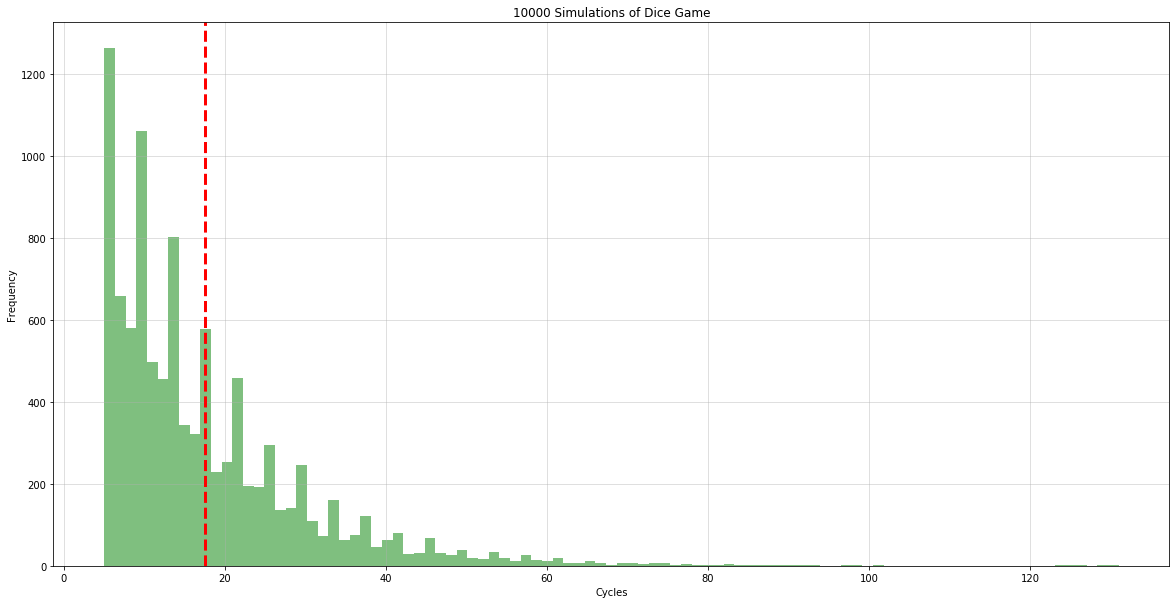

Mean # of cycles per game: 17.52


In [7]:
_ = simulate_n_games(DiceGame, 10000)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

fill this space with a writeup about the EV and Distribution.

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Since we are simulating the game 10,000 times, it would be interesting to see how the
Expected Value of the number of cycles varies from simulation to simulation. Our hypothesis
prior to running this is that the EV should be roughly the same (17.5), but variance that
forms a normal distribution. To test this, we can run the n simulations k times and plot
the resulting Expected Values.

This also helps us validate the EV number from the above single simulation of 10,000 iterations.

In [7]:
def get_mean_cycles_k_times(k=1000, n=100):
    """
    This function calls the simulate_n_games function
    k times in order to determine the distribution
    of the expected values.
    """
    means = []
    for i in range(k):
        means.append(simulate_n_games(DiceGame, n, plot=False))

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.hist(means, color='darkorchid', alpha=.5, bins=min(k//10,50));
    ax.set_title("Average # of Cycles for " + str(k) + " Simulations of " + str(n) + " Games");
    mean_of_means = np.mean(means)
    std_of_means = np.std(means)
    plt.xlim((mean_of_means-3*std_of_means, mean_of_means+3*std_of_means))
    plt.axvline(mean_of_means, color='red', ls='--', lw='3')
    plt.grid(True, alpha=.5)
        

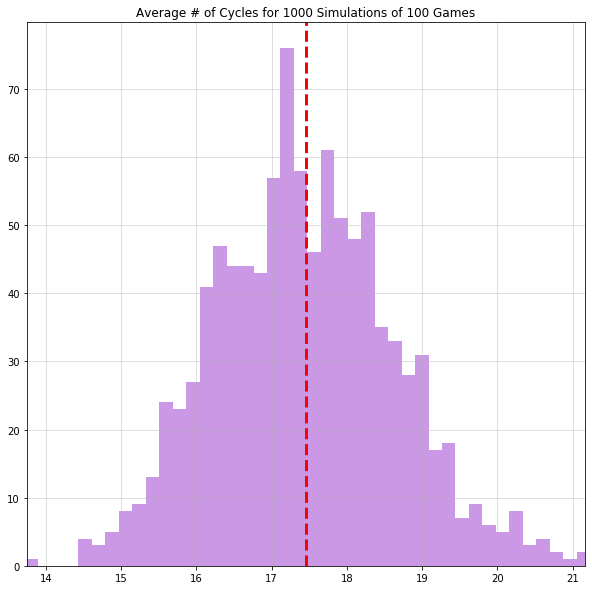

In [8]:
get_mean_cycles_k_times()

# note that the default values of k and n are used. 
# n is 100, not 10,000, for speed purposes.

Below, we have conducted additional simulations with slight modifications to the data collection and rules. Code for the modified DiceRoll classes can be found in the appendix.

### Winning % based on who goes first

In [39]:
def simulate_n_games_winner(n=1000, plot=True, first='a'):
    winner = []
    for i in range(n):
        game = DiceGame(first=first)
        game.play_game()
        winner.append(game.winner)
    
    #plt.hist(number_of_cycles, bins=len(set(number_of_cycles)))
    
    return len([i for i in winner if i == first])/n

In [40]:
simulate_n_games_winner(10000, 'a')  # says that when 'a' goes first, they win 50.327% of matches

0.5038

In [131]:
# how do we test if this result is significant?

### If rolling a 1 also results in having to give a coin

In [132]:
class ModifiedDiceGame1:

    def __init__(self, first='a'):
        self.player_a = 4
        self.player_b = 4
        self.pot = 2
        self.cycles = 0
        self.first = first
        self.players = {'a':self.player_a,
                        'b':self.player_b}
        self.current_player = self.first
        self.winner = None
    
    def __roll(self):
        return random.randrange(6) + 1
    
    def play_game(self): 
        while True:
            if self.current_player == 'a':
                self.cycles +=1
            outcome = self.__roll()
            if self.cycles == 1:
                self.first = outcome

            if outcome == 2:
                self.players[self.current_player] += self.pot
                self.pot = 0
            elif outcome == 3:
                half_pot = self.pot // 2
                self.players[self.current_player] += half_pot
                self.pot -= half_pot
            else:
                if self.players[self.current_player] == 0:
                    self.winner = 'a' if self.current_player == 'b' else 'b'
                    break
                self.players[self.current_player] -= 1
                self.pot += 1
            
            self.current_player = 'a' if self.current_player == 'b' else 'b'

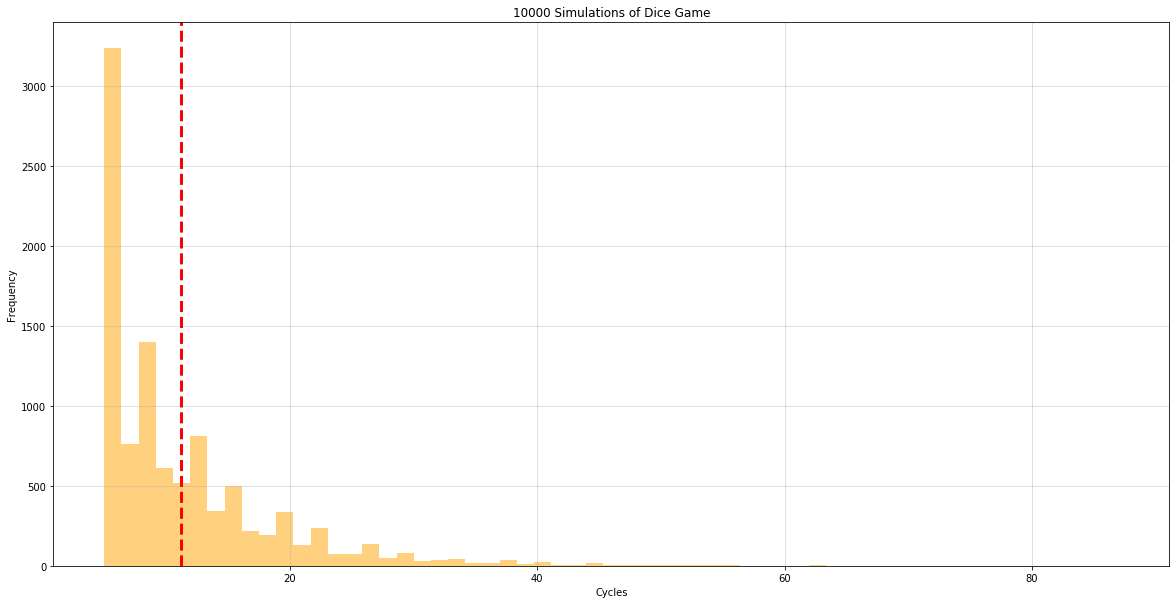

Mean # of cycles per game: 11.23


In [141]:
_ = simulate_n_games(ModifiedDiceGame1, 10000)

In [134]:
# should be simple analysis - increases the probability that a player loses a coin
# maybe we can talk about the variance here as well

### if rolling a 2 means player gets 2x coins in pot

In [137]:
class ModifiedDiceGame2x:

    def __init__(self, first='a'):
        self.player_a = 4
        self.player_b = 4
        self.pot = 2
        self.cycles = 0
        self.first = first
        self.players = {'a':self.player_a,
                        'b':self.player_b}
        self.current_player = self.first
        self.winner = None
    
    def __roll(self):
        return random.randrange(6) + 1
    
    def play_game(self): 
        while True:
            if self.cycles > 10000:  # had to cap the max # of cycles
                self.winner = 'draw'
                break
            if self.current_player == 'a':
                self.cycles +=1
            outcome = self.__roll()
            if self.cycles == 1:
                self.first = outcome

            if outcome == 1:
                continue
            elif outcome == 2:
                self.players[self.current_player] += self.pot
                self.pot = 0
            elif outcome == 3:
                half_pot = self.pot // 2
                self.players[self.current_player] += 2*half_pot
                self.pot -= half_pot
            else:
                if self.players[self.current_player] == 0:
                    self.winner = 'a' if self.current_player == 'b' else 'b'
                    break
                self.players[self.current_player] -= 1
                self.pot += 1
            
            self.current_player = 'a' if self.current_player == 'b' else 'b'

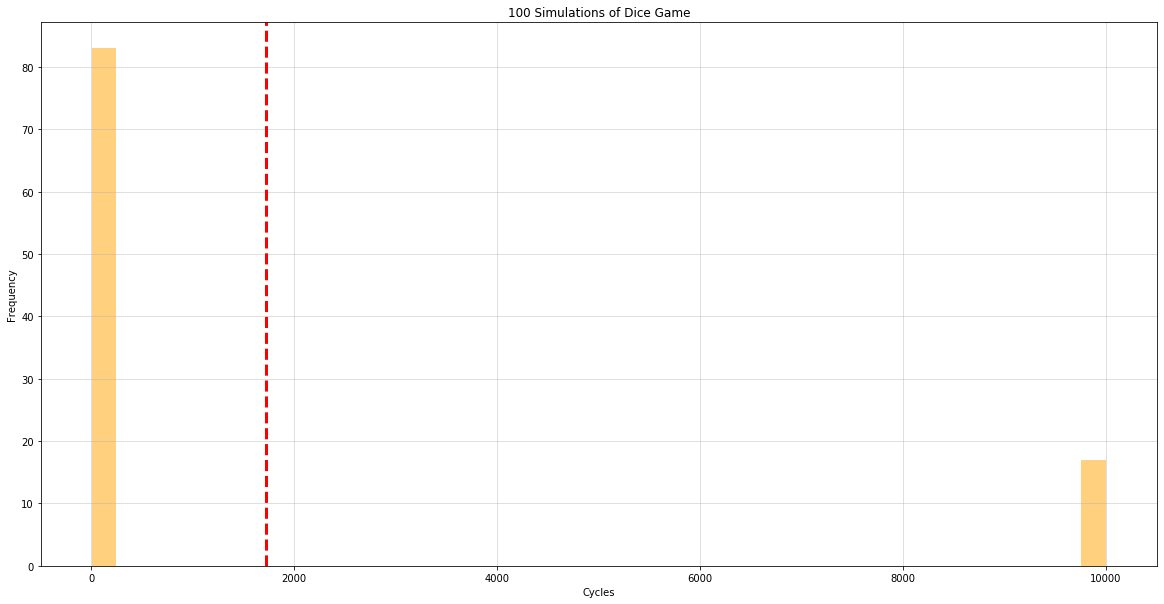

Mean # of cycles per game: 1722.0


In [140]:
_ = simulate_n_games(ModifiedDiceGame2x, 100)

In [139]:
# there's room for interesting analysis here around the variance caused by doubling the pot size
# we can perhaps talk about how it's important to define the game rules to avoid these issues,
# and maybe plot the pot sizes in the outlier case to show it approach infinity/10000

## Conclusion

## Appendix